In [56]:
#connecting to mongo client
import json
import pymongo
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
print(client.address, "Port =", client.PORT, "Host =", client.HOST, client.next)
#run this to have greetings


None Port = 27017 Host = localhost <bound method MongoClient.__next__ of MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)>


In [57]:
#listing all the collections in the  mongo database
dbs = client.list_database_names()


In [58]:
#% Now let's create a new database called salesdb
mydb = client["salesdb"]


In [59]:
#let's check if the database  is added into the mongoDb cluster
dblist = client.list_database_names()
if "salesdb" in dblist:
    print("The database exists.")
else:
    print("the database isn't added")

The database exists.


In [60]:
import os
import numpy as np
import seaborn as sns
import warnings
import  pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

print("setup-complete!")

setup-complete!


In [61]:
!pip install warnings
!pip install seaborn
!pip install matplotlib
!pip install statsmodels
!pip install statsmodels
!pip install IPython


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [62]:
mycollection = mydb["sales"]


In [63]:
#checking the collection names
addedCollection = mydb.list_collection_names()
if "sales" in addedCollection:
    print("Hey don't  WORRY movies  Collection is added successfully")
else:
    print("It seems like your collection hasn't been added")


Hey don't  WORRY movies  Collection is added successfully


In [64]:
#create a new collections in mongodb database sales db
customersCollection = mydb["customers"]
ordersCollection = mydb["orders"]
productsCollection = mydb["products"]
allCollections=mydb.list_collection_names()
[collection for collection in allCollections]

['sales']

Reading the data from cvs files

In [65]:
import pandas as pd
# Accommodate raw path to variables
raw_customer, raw_orders = "datasets/customers.csv", "datasets/orders.csv"
raw_products, raw_sales = "datasets/products.csv", "datasets/sales.csv"
# Read-in data
customer, order = pd.read_csv(raw_customer), pd.read_csv(raw_orders)
product, sales = pd.read_csv(raw_products), pd.read_csv(raw_sales)

Merging data
Let's merge customers, orders, and product data since it's having the same rows to make it easier to gather and analyse the data

In [66]:
cust_order = pd.merge(left=customer, right=order, left_index=True, right_index=True)
cop_data = pd.merge(left=cust_order, right=product, left_index=True, right_index=True)

Check Data
Let's see the data and how it looks.

In [67]:
cop_data


,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,433,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,441,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,345,37843,2021-1-13,2021-02-02,995,Trousers,Wool,XS,green,111,73,"A green coloured, XS sized, Wool Trousers"
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,346,53831,2021-1-18,2021-01-31,996,Trousers,Wool,S,green,111,43,"A green coloured, S sized, Wool Trousers"
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,407,53308,2021-5-5,2021-05-21,997,Trousers,Wool,M,green,111,41,"A green coloured, M sized, Wool Trousers"
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,428,31643,2021-6-15,2021-07-12,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers"


let's check sales data

In [68]:
sales

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339
...,...,...,...,...,...,...
4995,4995,998,321,109,2,218
4996,4996,998,251,95,3,285
4997,4997,999,872,113,1,113
4998,4998,999,998,106,2,212


sales data have  5000  rows dan  6  columns, and look like the data doesn,'t contains  any null-values and tha seems so good

In [69]:
# Getting all  the information about the data merged
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_ID     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

Let's have a look at categorical variables. How many unique values of these variables.

In [70]:
categorical = cop_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {cop_data[cat_col].nunique()} uniqueness variable(s)")


customer_name : 1000 uniqueness variable(s)
gender : 8 uniqueness variable(s)
home_address : 1000 uniqueness variable(s)
city : 961 uniqueness variable(s)
state : 8 uniqueness variable(s)
country : 1 uniqueness variable(s)
order_date : 291 uniqueness variable(s)
delivery_date : 305 uniqueness variable(s)
product_type : 3 uniqueness variable(s)
product_name : 28 uniqueness variable(s)
size : 5 uniqueness variable(s)
colour : 7 uniqueness variable(s)
description : 1000 uniqueness variable(s)


Discrete and Continuous Variables

In [71]:
#Let's have a look at Discrete and Continuous variables.
numeric = sales.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {sales[num_col].nunique()} uniqueness variable(s)")

sales_id : 5000 uniqueness variable(s)
order_id : 993 uniqueness variable(s)
product_id : 1233 uniqueness variable(s)
price_per_unit : 23 uniqueness variable(s)
quantity : 3 uniqueness variable(s)
total_price : 69 uniqueness variable(s)


Let's see how many missing data we have in each column

In [72]:
# Get the number of missing data points per column
missing_values_count = cop_data.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]


customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
dtype: int64

In [73]:
# Get the number of missing data points per column
missing_values_count = sales.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]


sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

let's convert Order Date column too, so we can take the Year, Month, and the other date easily.

In [74]:
# Convert it using to_datetime() function
cop_data["order_date"], cop_data["delivery_date"] = pd.to_datetime(cop_data["order_date"]), pd.to_datetime(cop_data["delivery_date"])
# Let's see it
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   datetime64[ns]
 14  product_ID     1000 non-null   int64         
 15  product_type   1000 no

Data Preparation
Let's prepare the data before we visualize it

In [75]:
cop_data["sales"] = cop_data["price"] * cop_data["quantity"] # let's make a sales data
cop_data.head(2)


,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042


In [76]:
# let's get the year data in order date column
cop_data['year_order'] = cop_data['order_date'].dt.year
# let's get the month data in order date column
cop_data['month_order'] = cop_data['order_date'].dt.month

# Let's get the day data in order date column
cop_data["day_order"] = cop_data["order_date"].dt.day

In [77]:
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3


In [78]:
# let's get the year data in delivery date column
cop_data['year_delivery'] = cop_data['delivery_date'].dt.year

# let's get the month data in delivery date column
cop_data['month_delivery'] = cop_data['delivery_date'].dt.month

# Let's get the day data in delivery date column
cop_data["day_delivery"] = cop_data["delivery_date"].dt.day


In [79]:
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3,2021,2,13


Data Analysis

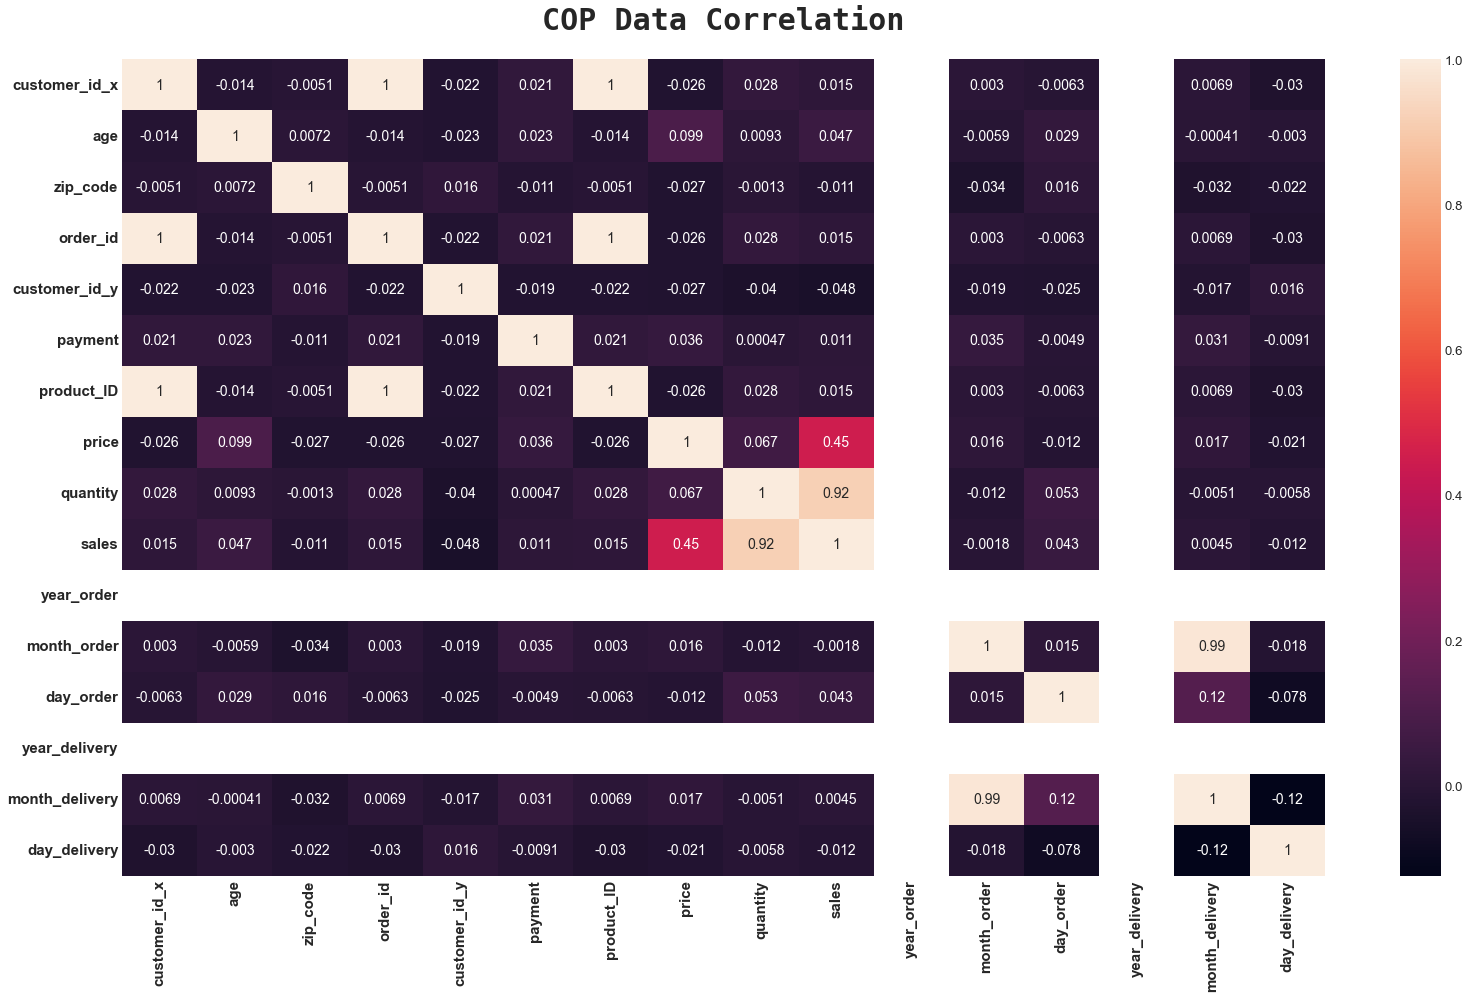

In [83]:
import os
import numpy as np
import seaborn as sns
import warnings
import  pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
sns.set_style("whitegrid") # set the seaborn style

# let's make a correlation matrix for `cop_data`


 # figure the size
plt.figure(figsize=(24, 14))
# create a heatmap
sns.heatmap(cop_data.corr(), annot=True)
plt.title("COP Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15);


In [84]:
# Let's see the correlation from `cop_data`
(cop_data.corr()["sales"] # transform it into data corr
         .sort_values(ascending=False) # sort values
         .to_frame() # change it into data frame
         .T) # transpose


,sales,quantity,price,age,day_order,customer_id_x,order_id,product_ID,payment,month_delivery,month_order,zip_code,day_delivery,customer_id_y,year_order,year_delivery
sales,1.0,0.918043,0.450207,0.047032,0.042621,0.015294,0.015294,0.015294,0.011012,0.00446,-0.001763,-0.010807,-0.012453,-0.047699,NaN,NaN


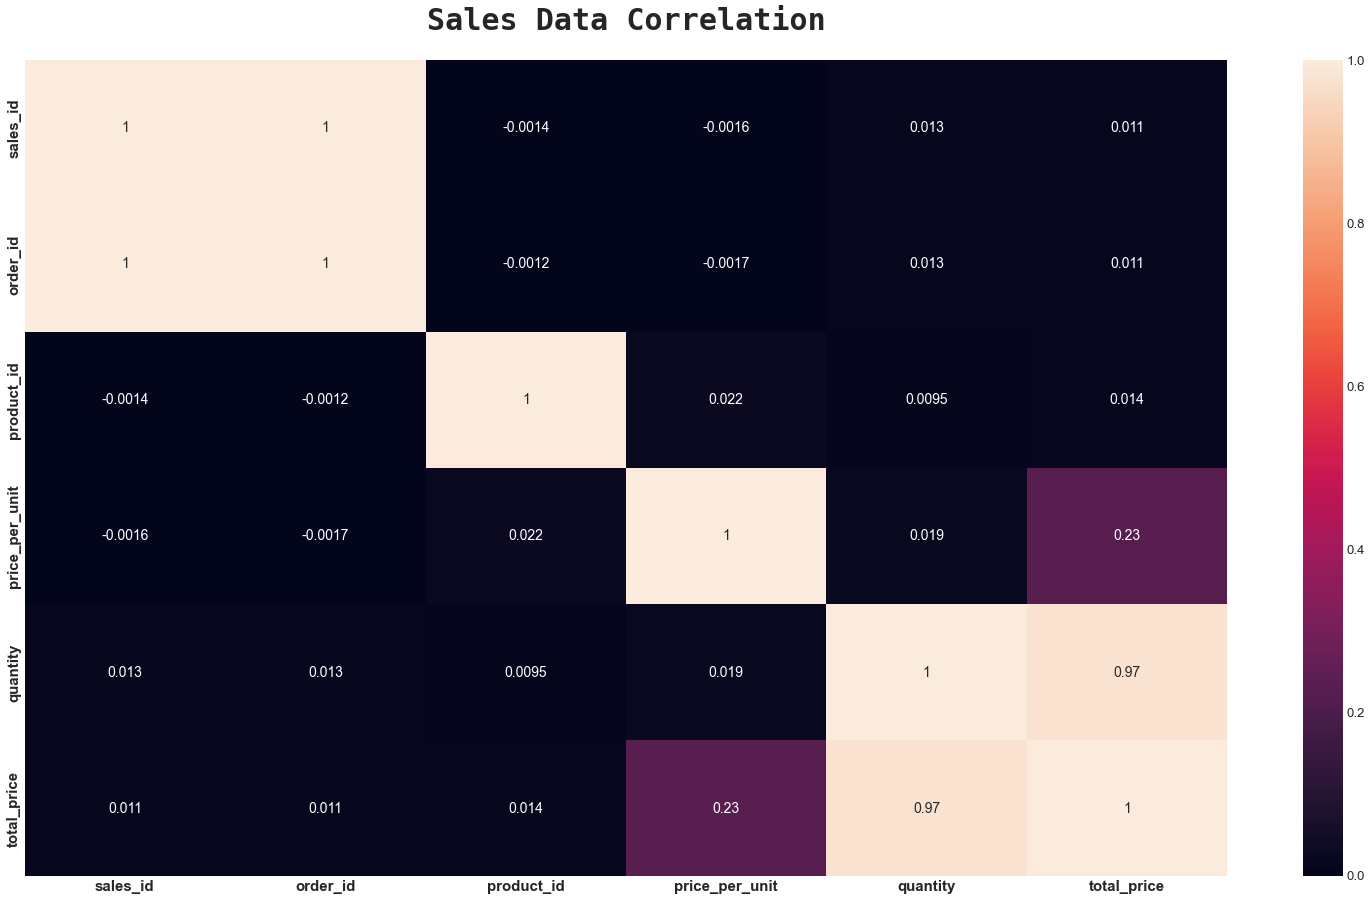

In [85]:
# let's make a correlation matrix for `sales`
plt.figure(figsize=(24, 14)) # figure the size
sns.heatmap(sales.corr(), annot=True) # construct the heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks


In [86]:
# Let's see the correlation of the total sales
(sales.corr()["total_price"]
      .sort_values(ascending=False)
      .to_frame()
      .T) # transpose


,total_price,quantity,price_per_unit,product_id,order_id,sales_id
total_price,1.0,0.973141,0.232178,0.013958,0.011283,0.011228


Statistical Measure
Let's have a look to the statistical measure in both of data

In [87]:
# Let's have a look to the discrete and continuous data first
cop_data.describe(include=[np.number])


,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000,500.500000,506.640000,33972.936000,499.500000,108.095000,60.371000,6532.937000,2021.0,5.376000,15.562000,2021.0,5.841000,15.508000
std,288.819436,17.647828,2884.497332,288.819436,277.115502,14451.609047,288.819436,9.158048,11.606812,1408.645064,0.0,2.847584,8.614776,0.0,2.907606,8.636813
min,1.000000,20.000000,2.000000,1.000000,1.000000,10043.000000,0.000000,90.000000,40.000000,3690.000000,2021.0,1.000000,1.000000,2021.0,1.000000,1.000000
25%,250.750000,34.000000,2401.750000,250.750000,275.250000,21329.250000,249.750000,102.000000,50.000000,5405.000000,2021.0,3.000000,8.000000,2021.0,3.000000,8.000000
50%,500.500000,50.000000,5083.000000,500.500000,515.000000,33697.500000,499.500000,112.000000,61.000000,6454.000000,2021.0,5.000000,16.000000,2021.0,6.000000,15.000000
75%,750.250000,65.000000,7460.250000,750.250000,737.250000,46249.000000,749.250000,115.000000,70.000000,7656.750000,2021.0,8.000000,23.000000,2021.0,8.000000,23.000000
max,1000.000000,80.000000,9998.000000,1000.000000,1000.000000,59910.000000,999.000000,119.000000,80.000000,9520.000000,2021.0,10.000000,31.000000,2021.0,11.000000,31.000000


In [88]:
# Let's have a look to sales data
sales.describe(include=[np.number])

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


In [89]:
#let's have a look to the categorical type.
cop_data.describe(exclude=[np.number])

,customer_name,gender,home_address,city,state,country,order_date,delivery_date,product_type,product_name,size,colour,description
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,8,1000,961,8,1,291,305,3,28,5,7,1000
top,Leanna Busson,Male,8606 Victoria TerraceSuite 560,East Sophia,South Australia,Australia,2021-06-20 00:00:00,2021-08-09 00:00:00,Shirt,Denim,XS,red,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,1,143,1,3,139,1000,10,9,420,70,200,145,1
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN,NaN,NaN,NaN,NaN


In [90]:
cop_data.head(1)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24


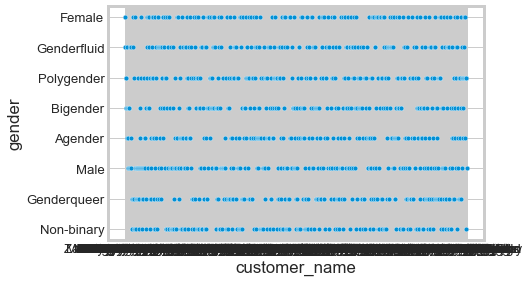

In [98]:
#let's visualize the costumer name and their gender
import csv
res = sns.scatterplot(x=cop_data["customer_name"], y=cop_data["gender"], data=csv)
plt.show()

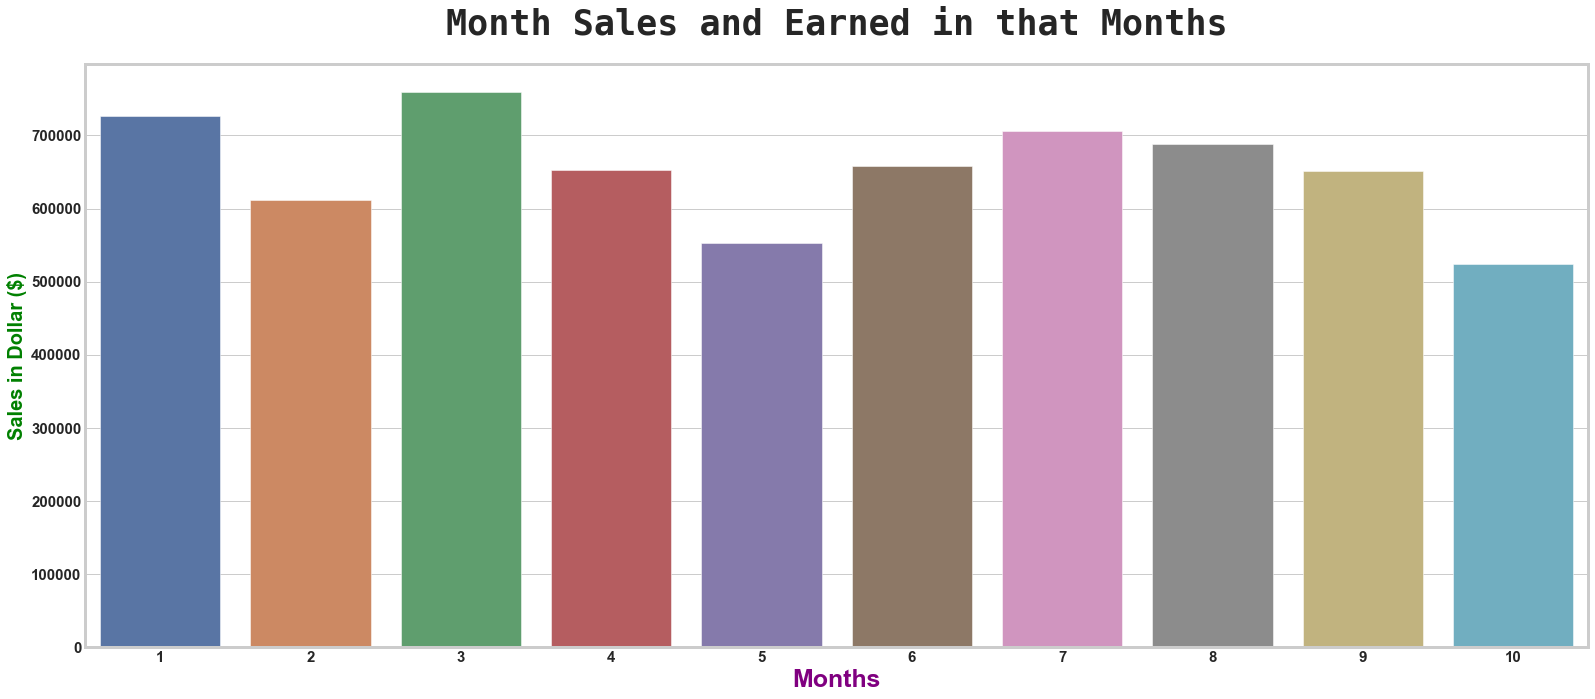

In [101]:
#have sales and revenue changed over the past few quarters
# group the Month cols
sum_month_order = cop_data.groupby(["month_order"]).sum().astype("int")
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot
sns.barplot(
    x=sum_month_order.index, # x-axis
    y=sum_month_order["sales"], # y-axis
    data=sum_month_order, # data
    palette="deep" # palette
)
# title
plt.title(
    "Month Sales and Earned in that Months",
    fontname="monospace", # fontname
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
# x-label
plt.xlabel(
    "Months",
    weight="bold",
    color="purple",
    fontsize=25,
    loc="center"
)
plt.xticks(
    weight="bold",
    fontsize=15
)
plt.ylabel(
    "Sales in Dollar ($)",
    weight="bold",
    color="green",
    fontsize=20
)
plt.yticks(
    weight="bold",
    fontsize=15
);

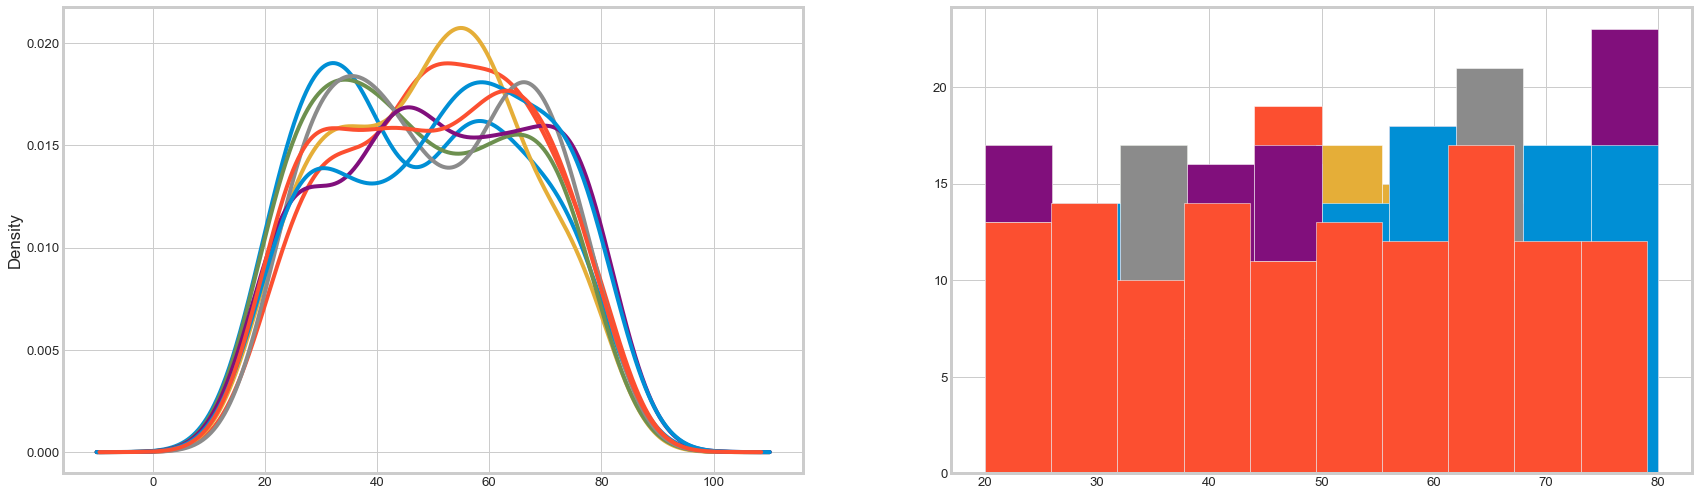

In [102]:
plt.figure(figsize=(26, 8)) # figure the size
plt.subplot(1, 2, 1) # make a subplots for making 2 visualization
cop_data.groupby("gender").age.plot(kind='kde'); # groupping gender and plot it
plt.subplot(1, 2, 2) # make a subplots for making 2 visualization
cop_data.groupby("gender").age.hist(); #

In [103]:
cop_data.head(1)


,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24


<AxesSubplot:xlabel='gender', ylabel='Percent'>

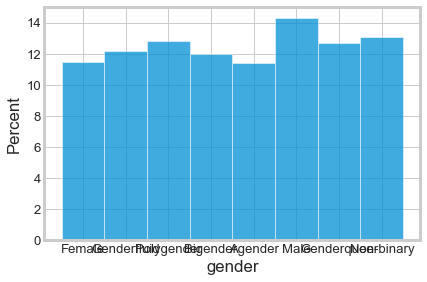

Exploratory data analysis

In [ ]:
#count all the gender in the data file
sns.histplot(x=cop_data["gender"], stat="percent",data=csv)

let's find the overall sales trend

In [118]:
#which are the top 10 products by sales
#Grouping columns by product name
products_sales=pd.DataFrame(cop_data.groupby('product_name').sum()['sales'])

In [119]:
#sorting product  sales columns
products_sales.sort_values('sales',ascending=False)

,sales
product_name,
Denim,436218
Parka,261919
Leather,257188
Polo,256932
Slim-Fit,256445
Cords,255380
Dress,252875
Pullover,248976
Coach,248170


In [120]:
#top 10 products by sales
products_sales[:10]

,sales
product_name,
Bomber,187470
Camp Collared,231952
Cardigan,239776
Casual Slim Fit,235718
Chambray,212100
Chinos,210100
Coach,248170
Cords,255380
Cuban Collar,187581


which are the most selling products ?

In [131]:
#Grouping products by name
most_sell_products=pd.DataFrame(cop_data.groupby('product_name').sum()["quantity"])

In [132]:
most_sell_products=most_sell_products.sort_values('quantity',ascending=False)

In [133]:
most_sell_products[:10]

,quantity
product_name,
Denim,4204
Leather,2276
Cords,2260
Mandarin Collar,2203
Parka,2201
Polo,2196
Pullover,2184
Shearling,2169
Coach,2158
